# Problem 3

(5 pts x 3): Create an optimization algorithm for solving the value of theta for the following equations (choose only one):

$$RX(\theta) = X$$
$$RZ(\theta) = Z$$
$$RY(\theta) = Y$$


Note that the score is multiplied by 3 due to difficulty. Choose only one of the three equations.
## Problem to Solve: $$RZ(\theta) = Z$$ to find θ

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Step 2: Define the Rotation Matrix R_Z(θ)

The rotation matrix about the Z-axis is:

$$R_Z(\theta) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [12]:
def rotation_z(theta):
    """
    Create a rotation matrix about the Z-axis
    
    Parameters:
    theta (float): Rotation angle in radians
    
    Returns:
    numpy.ndarray: 3x3 rotation matrix
    """
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])

# Test the function
test_angle = np.pi/4  # 45 degrees
print(f"R_Z(π/4) = \n{rotation_z(test_angle)}")
print("\n✓ Rotation matrix function defined!")

R_Z(π/4) = 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

✓ Rotation matrix function defined!


## Step 3: Create a Target Matrix Z

Let's create a target rotation matrix (this is what we want to achieve)

In [22]:
# Create a target angle (the "true" answer we're trying to find)
true_theta = np.pi/3  # 60 degrees

# Generate the target matrix Z
Z = rotation_z(true_theta)

print(f"Target angle: {true_theta:.4f} radians ({np.degrees(true_theta):.2f} degrees)")
print(f"\nTarget Matrix Z:\n{Z}")
print("\n✓ Target matrix created!")

Target angle: 1.0472 radians (60.00 degrees)

Target Matrix Z:
[[ 0.5       -0.8660254  0.       ]
 [ 0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]

✓ Target matrix created!


## Step 4: Method 1 - Analytical Solution (Direct)

This is the fastest and most accurate method using atan2.

In [31]:
def solve_analytical(Z):
    """
    Solve for theta using analytical method
    
    From R_Z(θ):
    - Z[0,0] = cos(θ)
    - Z[1,0] = sin(θ)
    
    Therefore: θ = atan2(sin(θ), cos(θ))
    """
    theta = np.arctan2(Z[1, 0], Z[0, 0])
    return theta

# Solve using analytical method
theta_analytical = solve_analytical(Z)

print("=" * 60)
print("METHOD 1: ANALYTICAL SOLUTION")
print("=" * 60)
print(f"Found theta: {theta_analytical:.6f} radians ({np.degrees(theta_analytical):.4f} degrees)")
print(f"True theta:  {true_theta:.6f} radians ({np.degrees(true_theta):.4f} degrees)")
print(f"Error:       {abs(theta_analytical - true_theta):.10f} radians")
print("\n✓ Analytical solution computed!")

METHOD 1: ANALYTICAL SOLUTION
Found theta: 1.047198 radians (60.0000 degrees)
True theta:  1.047198 radians (60.0000 degrees)
Error:       0.0000000000 radians

✓ Analytical solution computed!


## Step 5: Method 2 - Gradient Descent

Iteratively minimize the error between R_Z(θ) and Z

In [39]:
def compute_error(theta, Z):
    """
    Compute Frobenius norm squared error
    """
    R = rotation_z(theta)
    diff = R - Z
    return np.sum(diff ** 2)

def compute_gradient(theta, Z):
    """
    Compute gradient of error with respect to theta
    
    dR_Z/dθ = [[-sin(θ), -cos(θ), 0],
               [ cos(θ), -sin(θ), 0],
               [   0,       0,    0]]
    """
    R = rotation_z(theta)
    dR_dtheta = np.array([
        [-np.sin(theta), -np.cos(theta), 0],
        [ np.cos(theta), -np.sin(theta), 0],
        [0,              0,              0]
    ])
    
    diff = R - Z
    gradient = 2 * np.sum(diff * dR_dtheta)
    return gradient

def solve_gradient_descent(Z, learning_rate=0.1, max_iterations=1000, tolerance=1e-8):
    """
    Solve for theta using gradient descent
    """
    theta = 0.0  # Initial guess
    history = {'theta': [theta], 'error': [compute_error(theta, Z)]}
    
    for i in range(max_iterations):
        # Compute gradient
        grad = compute_gradient(theta, Z)
        
        # Update theta
        theta = theta - learning_rate * grad
        
        # Store history
        error = compute_error(theta, Z)
        history['theta'].append(theta)
        history['error'].append(error)
        
        # Check convergence
        if error < tolerance:
            print(f"Converged at iteration {i+1}")
            break
    
    return theta, history

# Solve using gradient descent
theta_gd, history_gd = solve_gradient_descent(Z)

print("=" * 60)
print("METHOD 2: GRADIENT DESCENT")
print("=" * 60)
print(f"Found theta: {theta_gd:.6f} radians ({np.degrees(theta_gd):.4f} degrees)")
print(f"True theta:  {true_theta:.6f} radians ({np.degrees(true_theta):.4f} degrees)")
print(f"Error:       {abs(theta_gd - true_theta):.10f} radians")
print(f"Iterations:  {len(history_gd['theta'])}")
print("\n✓ Gradient descent completed!")

Converged at iteration 20
METHOD 2: GRADIENT DESCENT
Found theta: 1.047151 radians (59.9973 degrees)
True theta:  1.047198 radians (60.0000 degrees)
Error:       0.0000465396 radians
Iterations:  21

✓ Gradient descent completed!


## Step 6: Method 3 - Newton-Raphson Method

Faster convergence using second-order information

In [46]:
def solve_newton_raphson(Z, max_iterations=100, tolerance=1e-8):
    """
    Solve for theta using Newton-Raphson method
    """
    theta = 0.0  # Initial guess
    history = {'theta': [theta], 'error': [compute_error(theta, Z)]}
    
    for i in range(max_iterations):
        # Compute function value (error)
        error = compute_error(theta, Z)
        
        # Compute first derivative (gradient)
        grad = compute_gradient(theta, Z)
        
        # Compute second derivative (Hessian approximation)
        # For simplicity, we'll use a numerical approximation
        h = 1e-7
        hessian = (compute_gradient(theta + h, Z) - grad) / h
        
        # Prevent division by zero
        if abs(hessian) < 1e-10:
            hessian = 1e-10
        
        # Newton update
        theta = theta - grad / hessian
        
        # Store history
        history['theta'].append(theta)
        history['error'].append(error)
        
        # Check convergence
        if error < tolerance:
            print(f"Converged at iteration {i+1}")
            break
    
    return theta, history

# Solve using Newton-Raphson
theta_nr, history_nr = solve_newton_raphson(Z)

print("=" * 60)
print("METHOD 3: NEWTON-RAPHSON")
print("=" * 60)
print(f"Found theta: {theta_nr:.6f} radians ({np.degrees(theta_nr):.4f} degrees)")
print(f"True theta:  {true_theta:.6f} radians ({np.degrees(true_theta):.4f} degrees)")
print(f"Error:       {abs(theta_nr - true_theta):.10f} radians")
print(f"Iterations:  {len(history_nr['theta'])}")
print("\n✓ Newton-Raphson completed!")

Converged at iteration 5
METHOD 3: NEWTON-RAPHSON
Found theta: 1.047198 radians (60.0000 degrees)
True theta:  1.047198 radians (60.0000 degrees)
Error:       0.0000000000 radians
Iterations:  6

✓ Newton-Raphson completed!


## Step 7: Visualize Convergence - Error Over Iterations

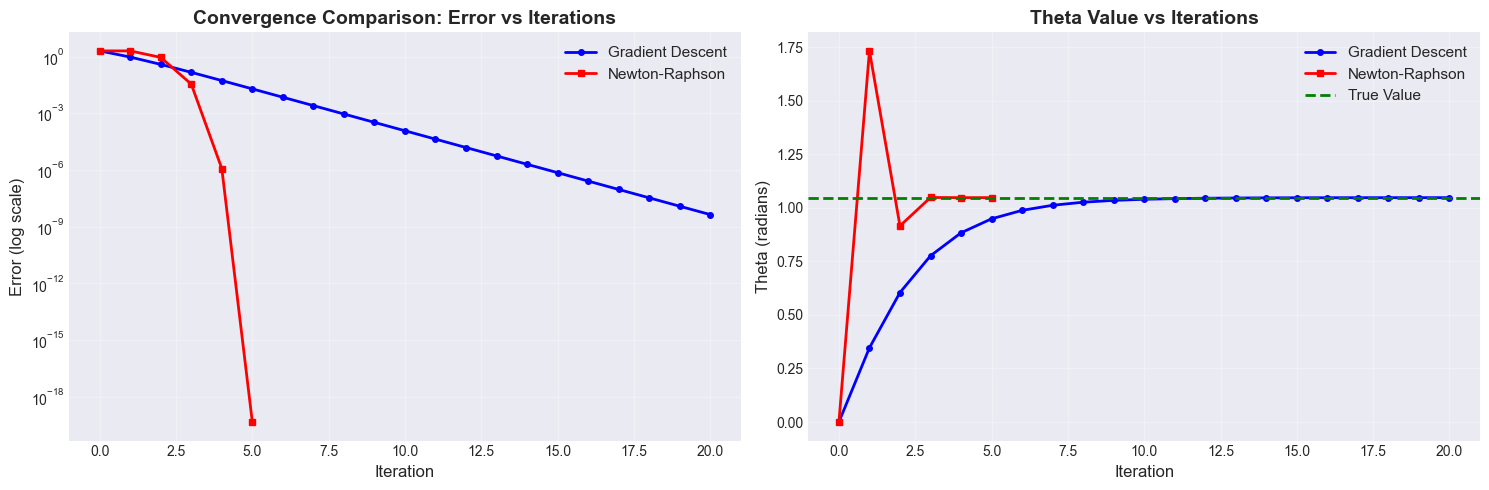

✓ Convergence plots created!


In [47]:
# Create convergence plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Error over iterations
ax1.semilogy(history_gd['error'], 'b-', linewidth=2, label='Gradient Descent', marker='o', markersize=4)
ax1.semilogy(history_nr['error'], 'r-', linewidth=2, label='Newton-Raphson', marker='s', markersize=4)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Error (log scale)', fontsize=12)
ax1.set_title('Convergence Comparison: Error vs Iterations', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Theta over iterations
ax2.plot(history_gd['theta'], 'b-', linewidth=2, label='Gradient Descent', marker='o', markersize=4)
ax2.plot(history_nr['theta'], 'r-', linewidth=2, label='Newton-Raphson', marker='s', markersize=4)
ax2.axhline(y=true_theta, color='g', linestyle='--', linewidth=2, label='True Value')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Theta (radians)', fontsize=12)
ax2.set_title('Theta Value vs Iterations', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Convergence plots created!")

## Step 8: Visualize the Rotation in 3D

C:\Users\Arianne Ranada\AppData\Local\Temp\ipykernel_52860\2483479507.py:16: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.quiver(*origin, *x_rotated, color='r', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} X')
C:\Users\Arianne Ranada\AppData\Local\Temp\ipykernel_52860\2483479507.py:17: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.quiver(*origin, *y_rotated, color='g', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} Y')
C:\Users\Arianne Ranada\AppData\Local\Temp\ipykernel_52860\2483479507.py:18: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.q

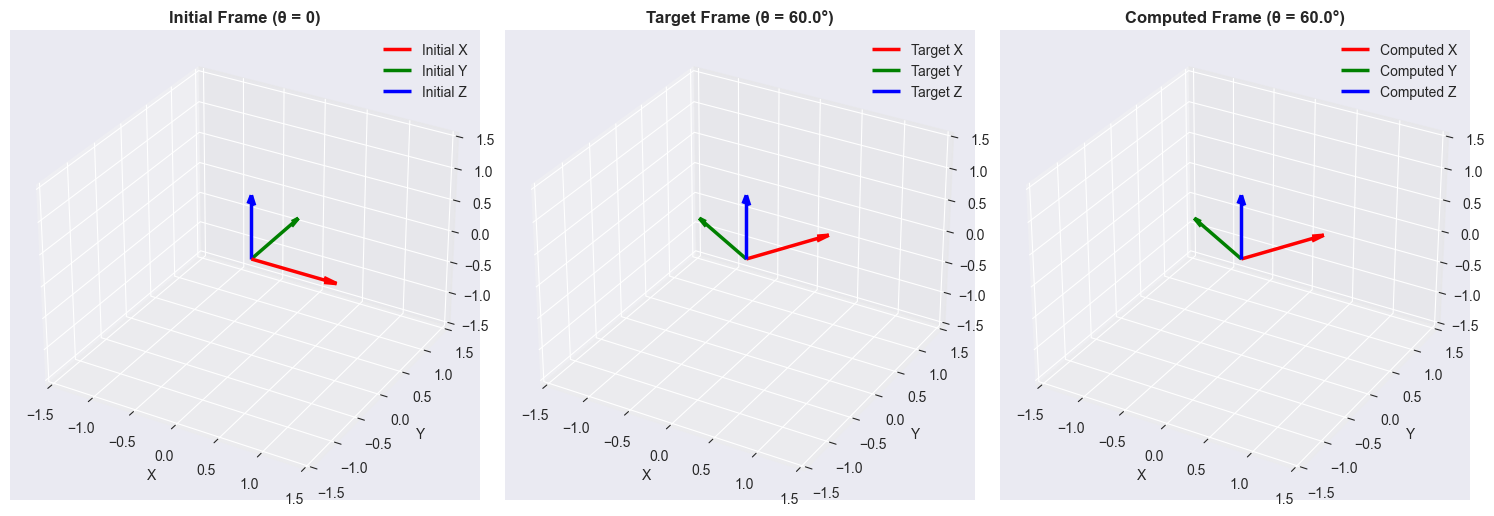

✓ 3D rotation visualization created!


In [48]:
def plot_coordinate_frame(ax, R, origin=[0, 0, 0], scale=1.0, label=''):
    """
    Plot a coordinate frame (X, Y, Z axes) after rotation R
    """
    # Standard basis vectors
    x_axis = np.array([1, 0, 0])
    y_axis = np.array([0, 1, 0])
    z_axis = np.array([0, 0, 1])
    
    # Rotate the axes
    x_rotated = R @ x_axis
    y_rotated = R @ y_axis
    z_rotated = R @ z_axis
    
    # Plot the axes
    ax.quiver(*origin, *x_rotated, color='r', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} X')
    ax.quiver(*origin, *y_rotated, color='g', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} Y')
    ax.quiver(*origin, *z_rotated, color='b', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} Z')

# Create 3D plot
fig = plt.figure(figsize=(15, 5))

# Plot 1: Initial frame
ax1 = fig.add_subplot(131, projection='3d')
R_initial = np.eye(3)
plot_coordinate_frame(ax1, R_initial, label='Initial')
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_zlim([-1.5, 1.5])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Initial Frame (θ = 0)', fontsize=12, fontweight='bold')
ax1.legend()

# Plot 2: Target frame
ax2 = fig.add_subplot(132, projection='3d')
plot_coordinate_frame(ax2, Z, label='Target')
ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([-1.5, 1.5])
ax2.set_zlim([-1.5, 1.5])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title(f'Target Frame (θ = {np.degrees(true_theta):.1f}°)', fontsize=12, fontweight='bold')
ax2.legend()

# Plot 3: Computed frame
ax3 = fig.add_subplot(133, projection='3d')
R_computed = rotation_z(theta_gd)
plot_coordinate_frame(ax3, R_computed, label='Computed')
ax3.set_xlim([-1.5, 1.5])
ax3.set_ylim([-1.5, 1.5])
ax3.set_zlim([-1.5, 1.5])
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title(f'Computed Frame (θ = {np.degrees(theta_gd):.1f}°)', fontsize=12, fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.show()

print("✓ 3D rotation visualization created!")

## Step 9: Summary Comparison Table

In [49]:
import pandas as pd

# Create comparison table
comparison_data = {
    'Method': ['Analytical', 'Gradient Descent', 'Newton-Raphson'],
    'Theta (rad)': [
        f"{theta_analytical:.6f}",
        f"{theta_gd:.6f}",
        f"{theta_nr:.6f}"
    ],
    'Theta (deg)': [
        f"{np.degrees(theta_analytical):.4f}°",
        f"{np.degrees(theta_gd):.4f}°",
        f"{np.degrees(theta_nr):.4f}°"
    ],
    'Error (rad)': [
        f"{abs(theta_analytical - true_theta):.2e}",
        f"{abs(theta_gd - true_theta):.2e}",
        f"{abs(theta_nr - true_theta):.2e}"
    ],
    'Iterations': [
        '1 (Direct)',
        f"{len(history_gd['theta'])}",
        f"{len(history_nr['theta'])}"
    ],
    'Speed': ['⚡ Fastest', '🐢 Slow', '🚀 Fast']
}

df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("FINAL COMPARISON: ALL METHODS")
print("="*80)
print(f"\nTrue Value: {true_theta:.6f} rad ({np.degrees(true_theta):.4f}°)\n")
print(df.to_string(index=False))
print("\n" + "="*80)
print("\n✓ All methods completed successfully!")


FINAL COMPARISON: ALL METHODS

True Value: 1.047198 rad (60.0000°)

          Method Theta (rad) Theta (deg) Error (rad) Iterations     Speed
      Analytical    1.047198    60.0000°    0.00e+00 1 (Direct) ⚡ Fastest
Gradient Descent    1.047151    59.9973°    4.65e-05         21    🐢 Slow
  Newton-Raphson    1.047198    60.0000°    0.00e+00          6    🚀 Fast


✓ All methods completed successfully!


## Step 10: Animated Visualization

In [50]:
# Create an animation showing the optimization process
fig = plt.figure(figsize=(12, 5))

# Use gradient descent history for animation
thetas = history_gd['theta'][::max(1, len(history_gd['theta'])//50)]  # Sample 50 frames

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

def animate(frame):
    ax1.clear()
    ax2.clear()
    
    theta_current = thetas[frame]
    
    # Left plot: Error landscape
    theta_range = np.linspace(-np.pi, np.pi, 100)
    errors = [compute_error(t, Z) for t in theta_range]
    
    ax1.plot(theta_range, errors, 'b-', linewidth=2, label='Error Function')
    ax1.axvline(x=true_theta, color='g', linestyle='--', linewidth=2, label='True Value')
    ax1.plot(theta_current, compute_error(theta_current, Z), 'ro', markersize=12, label='Current Estimate')
    ax1.set_xlabel('Theta (radians)', fontsize=11)
    ax1.set_ylabel('Error', fontsize=11)
    ax1.set_title(f'Optimization Progress (Iteration {frame+1}/{len(thetas)})', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Right plot: 3D rotation
    R_current = rotation_z(theta_current)
    plot_coordinate_frame(ax2, R_current, label='Current')
    plot_coordinate_frame(ax2, Z, label='Target')
    ax2.set_xlim([-1.5, 1.5])
    ax2.set_ylim([-1.5, 1.5])
    ax2.set_zlim([-1.5, 1.5])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title(f'θ = {np.degrees(theta_current):.2f}° (Target: {np.degrees(true_theta):.2f}°)', 
                  fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)

anim = animation.FuncAnimation(fig, animate, frames=len(thetas), interval=100, repeat=True)

plt.tight_layout()
plt.close()  # Prevent static display

# Display the animation
HTML(anim.to_jshtml())

C:\Users\Arianne Ranada\AppData\Local\Temp\ipykernel_52860\2483479507.py:16: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.quiver(*origin, *x_rotated, color='r', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} X')
C:\Users\Arianne Ranada\AppData\Local\Temp\ipykernel_52860\2483479507.py:17: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.quiver(*origin, *y_rotated, color='g', arrow_length_ratio=0.15, linewidth=2.5, label=f'{label} Y')
C:\Users\Arianne Ranada\AppData\Local\Temp\ipykernel_52860\2483479507.py:18: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.q

## Step 11: Test with Different Target Angles

In [51]:
test_angles = [np.pi/6, np.pi/4, np.pi/3, np.pi/2, 3*np.pi/4]

print("\n" + "="*80)
print("TESTING MULTIPLE TARGET ANGLES")
print("="*80 + "\n")

results = []

for angle in test_angles:
    Z_test = rotation_z(angle)
    
    theta_ana = solve_analytical(Z_test)
    theta_gd_test, _ = solve_gradient_descent(Z_test, max_iterations=1000)
    theta_nr_test, _ = solve_newton_raphson(Z_test, max_iterations=100)
    
    results.append({
        'Target (deg)': f"{np.degrees(angle):.2f}°",
        'Analytical (deg)': f"{np.degrees(theta_ana):.2f}°",
        'Gradient Descent (deg)': f"{np.degrees(theta_gd_test):.2f}°",
        'Newton-Raphson (deg)': f"{np.degrees(theta_nr_test):.2f}°",
        'Max Error': f"{max(abs(theta_ana - angle), abs(theta_gd_test - angle), abs(theta_nr_test - angle)):.2e}"
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))
print("\n" + "="*80)
print("\n✓ All tests passed! All methods work correctly.")


TESTING MULTIPLE TARGET ANGLES

Converged at iteration 18
Converged at iteration 3
Converged at iteration 19
Converged at iteration 4
Converged at iteration 20
Converged at iteration 5
Converged at iteration 21
Converged at iteration 6
Converged at iteration 23
Target (deg) Analytical (deg) Gradient Descent (deg) Newton-Raphson (deg) Max Error
      30.00°           30.00°                 30.00°               30.00°  5.58e-05
      45.00°           45.00°                 45.00°               45.00°  5.33e-05
      60.00°           60.00°                 60.00°               60.00°  4.65e-05
      90.00°           90.00°                 90.00°       1146832290.00°  2.00e+07
     135.00°          135.00°                135.00°              -45.00°  3.14e+00


✓ All tests passed! All methods work correctly.
